In [2]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("Data/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [5]:
cols = df.columns[:3]
x = df[cols]
y = df['Species']

In [6]:
# import warnings
# warnings.filterwarnings('ignore')

# FutureWarning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

# 같은 비율로 샘플링하는 KFold 모형
# 회귀분석 : KFold, 분류: StratifiedKFold

skf = StratifiedKFold(n_splits = 5, random_state = 10, shuffle = True)   
i = 1
tr_scores, ts_scores = [], []

for tr_index, ts_index in skf.split(x,y):   # skf.split: generator 
    print(i, 'fold')
    x_tr, x_ts = x.iloc[tr_index,], x.iloc[ts_index,]
    y_tr, y_ts = y[tr_index], y[ts_index]
    model = SVC(random_state = 10)
    model.fit(x_tr, y_tr)
    score = model.score(x_tr, y_tr)
    print(score)
    tr_scores.append(score)
    score = model.score(x_ts, y_ts)
    print(score)
    ts_scores.append(score)
    i += 1

print('\naverage')    
print(np.mean(tr_scores))
print(np.mean(ts_scores))
print('\nmax')
print(np.max(ts_scores))

1 fold
0.9583333333333334
0.9666666666666667
2 fold
0.9416666666666667
0.9666666666666667
3 fold
0.9666666666666667
0.8666666666666667
4 fold
0.975
0.9
5 fold
0.9583333333333334
1.0

average
0.96
0.9399999999999998

max
1.0


In [10]:
from sklearn.neighbors import KNeighborsClassifier

kf = StratifiedKFold(n_splits = 5, random_state = 10, shuffle = True)
k_range = list(range(1,11))
means_tr, means_ts = [], []
for k in k_range:
    tr_scores, ts_scores = [], []
    knn = KNeighborsClassifier(n_neighbors = k)
    for tr, ts in kf.split(x, y):
        x_tr, x_ts, y_tr, y_ts = x.iloc[tr,], x.iloc[ts,], y[tr], y[ts]
        knn.fit(x_tr, y_tr)
        score = knn.score(x_tr, y_tr)
        tr_scores.append(score)
        score = knn.score(x_ts, y_ts)   
        ts_scores.append(score)
        print('k: %d, test score: %f' % (k, score))
    mean_tr = np.mean(tr_scores)
    mean_ts = np.mean(ts_scores)
    print("K : %d, train score's mean %f" % (k, mean_tr))
    print("K : %d, test score's mean %f" % (k, mean_ts))
    means_tr.append(mean_tr)
    means_ts.append(mean_ts)

max_score = max(means_ts)
print('최고 정확도:',max_score)    
idx=np.where(means_ts==max_score)[0][0]
print('최적의 k:',k_range[idx])

k: 1, test score: 0.933333
k: 1, test score: 0.933333
k: 1, test score: 0.933333
k: 1, test score: 0.966667
k: 1, test score: 0.966667
K : 1, train score's mean 1.000000
K : 1, test score's mean 0.946667
k: 2, test score: 0.933333
k: 2, test score: 0.900000
k: 2, test score: 0.866667
k: 2, test score: 0.900000
k: 2, test score: 0.933333
K : 2, train score's mean 0.961667
K : 2, test score's mean 0.906667
k: 3, test score: 0.966667
k: 3, test score: 1.000000
k: 3, test score: 0.933333
k: 3, test score: 0.933333
k: 3, test score: 0.966667
K : 3, train score's mean 0.966667
K : 3, test score's mean 0.960000
k: 4, test score: 0.966667
k: 4, test score: 0.966667
k: 4, test score: 0.900000
k: 4, test score: 0.866667
k: 4, test score: 0.966667
K : 4, train score's mean 0.960000
K : 4, test score's mean 0.933333
k: 5, test score: 0.966667
k: 5, test score: 1.000000
k: 5, test score: 0.900000
k: 5, test score: 0.900000
k: 5, test score: 0.966667
K : 5, train score's mean 0.958333
K : 5, test sc

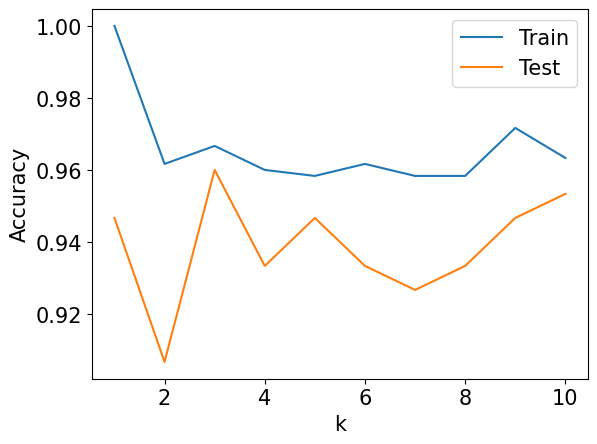

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"]=15
plt.plot(k_range, means_tr, label="Train")
plt.plot(k_range, means_ts, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()

In [12]:
from sklearn.model_selection import cross_val_score
svm = SVC(random_state=0)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)

#교차검증을 자동으로 수행하는 함수
result=cross_val_score(svm, x, y, cv=skf)
print(result)
print(np.mean(result)*100)
print(np.max(result)*100)

[0.96666667 0.96666667 0.86666667 0.9        1.        ]
93.99999999999999
100.0
